In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from EMP.EMP import drawPuzzle, generatePuzzle, isCorrect
import random
import time

In [2]:
from EMP.EMP import _rotate, _validPiece, _emptyPiece
import copy

In [3]:
from EMP.Algorithms.MCTS_random import MCTS as mcts
from EMP.Algorithms.MCTS_discrete import MCTS as mcts2
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
number_of_puzzles = 100
number_of_runs    = 100
x1 = np.zeros(number_of_puzzles)
x2 = np.zeros(number_of_puzzles)
y = np.arange(number_of_puzzles)
for i in range(number_of_puzzles):
    randseed = random.randint(0,100000)
    size =(3,3)
    
    for j in range(number_of_runs):
        
        parm = 2    
        #print("mcts_discrete")
        pieces, id = generatePuzzle(size, 3, EMPType='S', return_='pieces', rotate=True, seed=randseed)
        start = time.time()
        mcts_d = mcts2(pieces,size, EMPType='S', rotate=True, parm=parm)
        mcts_d.mcts_search()
        end = time.time()
        #print(end - start)
        
        x1[i] += (end - start)
        
        
        parm = 2    
        #print("mcts_random")
        pieces, id = generatePuzzle(size, 3, EMPType='S', return_='pieces', rotate=True, seed=randseed)
        start = time.time()
        mcts_r = mcts(pieces,size, EMPType='S', rotate=True, parm=parm)
        mcts_r.mcts_search()
        end = time.time()
        #print(end - start)
        #print(end-start)
        
        x2[i] += (end - start) 
        
        

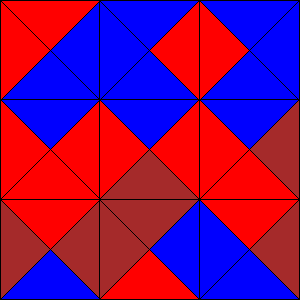

In [5]:
drawPuzzle(mcts_d.grid)

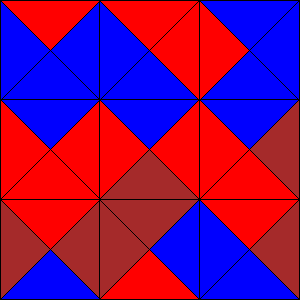

In [6]:
drawPuzzle(mcts_r.grid)

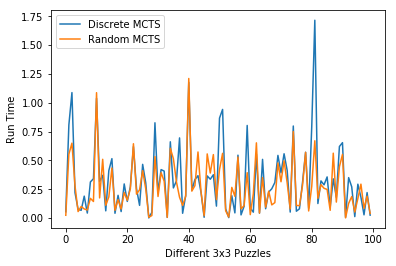

In [7]:
#for i in range(2):
plt.plot(y,x1/number_of_runs, label='Discrete MCTS'.format(i=1))
plt.plot(y,x2/number_of_runs, label='Random MCTS'.format(i=2))
plt.xlabel("Different 3x3 Puzzles")
plt.ylabel("Run Time")
plt.legend(loc='best')
plt.show()